## Little VGG

`Our own vgg`

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Activation,Dense,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.advanced_activations import ELU
import os

In [2]:
num_classes = 20
img_rows,img_cols = 32,32
batch_size = 16

train_data_dir = './simpsons/train'
validation_data_dir = './simpsons/validation'

#Performing data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
                                  
    
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size = (img_rows,img_cols),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size = (img_rows,img_cols),
                                                             batch_size = batch_size,
                                                             class_mode = 'categorical')


Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


## Let's create our own VGG (LITTLEVGG)

In [3]:
model = Sequential()

# First CONV-RELU Layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(BatchNormalization()) #Layer that normalizes its inputs.

# Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

#Seconf CONV-RELU layer
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(BatchNormalization())

#MAxPooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#3rd set of Conv-relu layer
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())

# 4th set of conv-relu layers
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())

#MAx pooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#5th set of conv Relu layer
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())

#6th set of conv Relu layer
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())

#MAx pooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#First set of fc layer or dense layer
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Second set of FC or dense layer
# model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Final Dense layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

#Printing summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

## Training our VGG model

In [4]:
from keras.optimizers import RMSprop, SGD , Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('./simspons_little_vgg.h5',
                            monitor='val_loss',
                            mode='min',
                            save_best_only = True,
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0,
                         patience = 3,
                         verbose = 1,
                         restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.2,
                             patience = 3,
                             verbose = 1,
                             min_delta = 0.00001)

#we put our call backs into callback list
callbacks = [earlystop,checkpoint,reduce_lr]


#Compiling the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


nb_train_samples = 19548
nb_validation_samples = 990

epochs = 50

history = model.fit(train_generator,
                   steps_per_epoch = nb_train_samples//batch_size,
                   epochs = epochs,
                   callbacks = callbacks,
                   validation_data = validation_generator,
                   validation_steps = nb_validation_samples/batch_size)

Epoch 1/50
1221/1221 [==============================] - 233s 185ms/step - loss: 3.4829 - accuracy: 0.1200 - val_loss: 2.2930 - val_accuracy: 0.3182

Epoch 00001: val_loss improved from inf to 2.29296, saving model to .\simspons_little_vgg.h5
Epoch 2/50
1221/1221 [==============================] - 91s 75ms/step - loss: 2.3008 - accuracy: 0.3021 - val_loss: 1.7440 - val_accuracy: 0.4495

Epoch 00002: val_loss improved from 2.29296 to 1.74398, saving model to .\simspons_little_vgg.h5
Epoch 3/50
1221/1221 [==============================] - 96s 79ms/step - loss: 1.8046 - accuracy: 0.4520 - val_loss: 1.4683 - val_accuracy: 0.5465

Epoch 00003: val_loss improved from 1.74398 to 1.46833, saving model to .\simspons_little_vgg.h5
Epoch 4/50
1221/1221 [==============================] - 116s 95ms/step - loss: 1.4191 - accuracy: 0.5790 - val_loss: 1.4267 - val_accuracy: 0.5929

Epoch 00004: val_loss improved from 1.46833 to 1.42667, saving model to .\simspons_little_vgg.h5
Epoch 5/50
1221/1221 [===

## Performance Analysis

Found 990 images belonging to 20 classes.
Confusion matrix
[[46  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 47  1  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0 47  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0  0  0  0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 45  0  0  0  0  0  1  0  0  0  2  2  0  0]
 [ 0  0  1  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 49  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  1  0  0 46  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0 47  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0 48  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  0  0  0 47  0  0  0  0 

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lisa_simpson', 'marge_simpson', 'mayor_quimby', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner', 'sideshow_bob'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\envs\cv

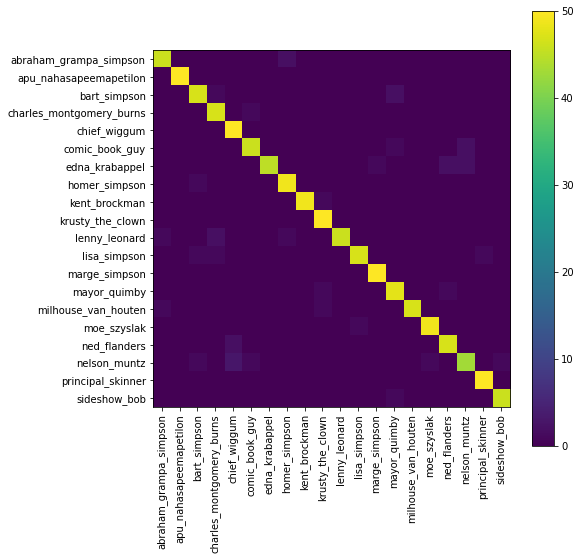

In [13]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# we need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_rows,img_cols),
batch_size = batch_size,
class_mode = 'categorical',
shuffle = False)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990


#Confusion matrix and classification report
Y_pred = model.predict(validation_generator,nb_validation_samples//batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)

#Confusion matrix and Classification report
print('Confusion matrix')
print(confusion_matrix(validation_generator.classes,y_pred))
print("Classification report")
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes,y_pred,target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes,y_pred)

plt.imshow(cnf_matrix,interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks,classes,rotation=90)
_ = plt.yticks(tick_marks,classes)
                   
                   

## Let's Reload our  saved Classifier

In [48]:
from keras.models import load_model
classifier = load_model('./simspons_little_vgg.h5')

## Testing the model

In [87]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    # cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value)
    #method is used to create a border around the image like a photo frame.
    cv2.putText(expanded_image, "predicted - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    # pred is from function draw_test
    # cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
    #  used to draw a text string on any image.
    cv2.putText(expanded_image,"true - "+ true_label,(20,120),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow(name , expanded_image)
    
    
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

In [88]:
# dimesnions of our images 
img_width,img_height = 32,32

#creating empty lists
files = []
predictions = []
true_labels = []

#predicting images

for i in range(0, 15):
    path = './simpsons/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img) #converts a pil image instance to numpy array
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [90]:
! git add Simpson_OurOwnVGG.ipynb simspons_little_vgg.h5
! git commit -m "14:56/14-05-2021"
! git push origin main

The file will have its original line endings in your working directory


[main 397c0e2] 14:56/14-05-2021
 2 files changed, 717 insertions(+)
 create mode 100644 CreatingOwnVGG(Simpson)/Simpson_OurOwnVGG.ipynb
 create mode 100644 CreatingOwnVGG(Simpson)/simspons_little_vgg.h5
